In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
f1_laps = pd.read_csv("../data/f1_laps_cleaned.csv")
f1_results = pd.read_csv("../data/f1_results_cleaned.csv")

# Load qualifying data if available
try:
    f1_qualifying = pd.read_csv("../data/f1_qualifying_cleaned.csv")
    has_qualifying = True
    print(f"✓ Loaded {len(f1_qualifying)} qualifying records")
except FileNotFoundError:
    f1_qualifying = pd.DataFrame()
    has_qualifying = False
    print("⚠ No qualifying data found. Run data_collection.py to collect it.")

print(f"Loaded {len(f1_laps)} laps, {len(f1_results)} results")

✓ Loaded 180 qualifying records
Loaded 9862 laps, 180 results


In [9]:
f1_laps.head()

,Year,Race,Driver,Team,LapNumber,LapTime_seconds,Position,TireCompound,TireAge
0,2025,16,VER,Red Bull Racing,1.0,87.159,1.0,MEDIUM,1.0
1,2025,16,VER,Red Bull Racing,2.0,84.859,2.0,MEDIUM,2.0
2,2025,16,VER,Red Bull Racing,3.0,83.512,2.0,MEDIUM,3.0
3,2025,16,VER,Red Bull Racing,4.0,83.262,1.0,MEDIUM,4.0
4,2025,16,VER,Red Bull Racing,5.0,83.588,1.0,MEDIUM,5.0


In [10]:
f1_results.head()

,Year,Race,Driver,Team,Position,GridPosition,Points,Status,BestQualifyingTime,GapToPole,QualifyingPerformance
0,2025,16,M VERSTAPPEN,Red Bull Racing,1.0,1.0,25.0,Finished,78.792,0.000,5.0
1,2025,16,L NORRIS,McLaren,2.0,2.0,18.0,Finished,78.869,0.077,10.0
2,2025,16,O PIASTRI,McLaren,3.0,3.0,15.0,Finished,78.982,0.190,15.0
3,2025,16,C LECLERC,Ferrari,4.0,4.0,12.0,Finished,79.007,0.215,20.0
4,2025,16,G RUSSELL,Mercedes,5.0,5.0,10.0,Finished,79.157,0.365,30.0


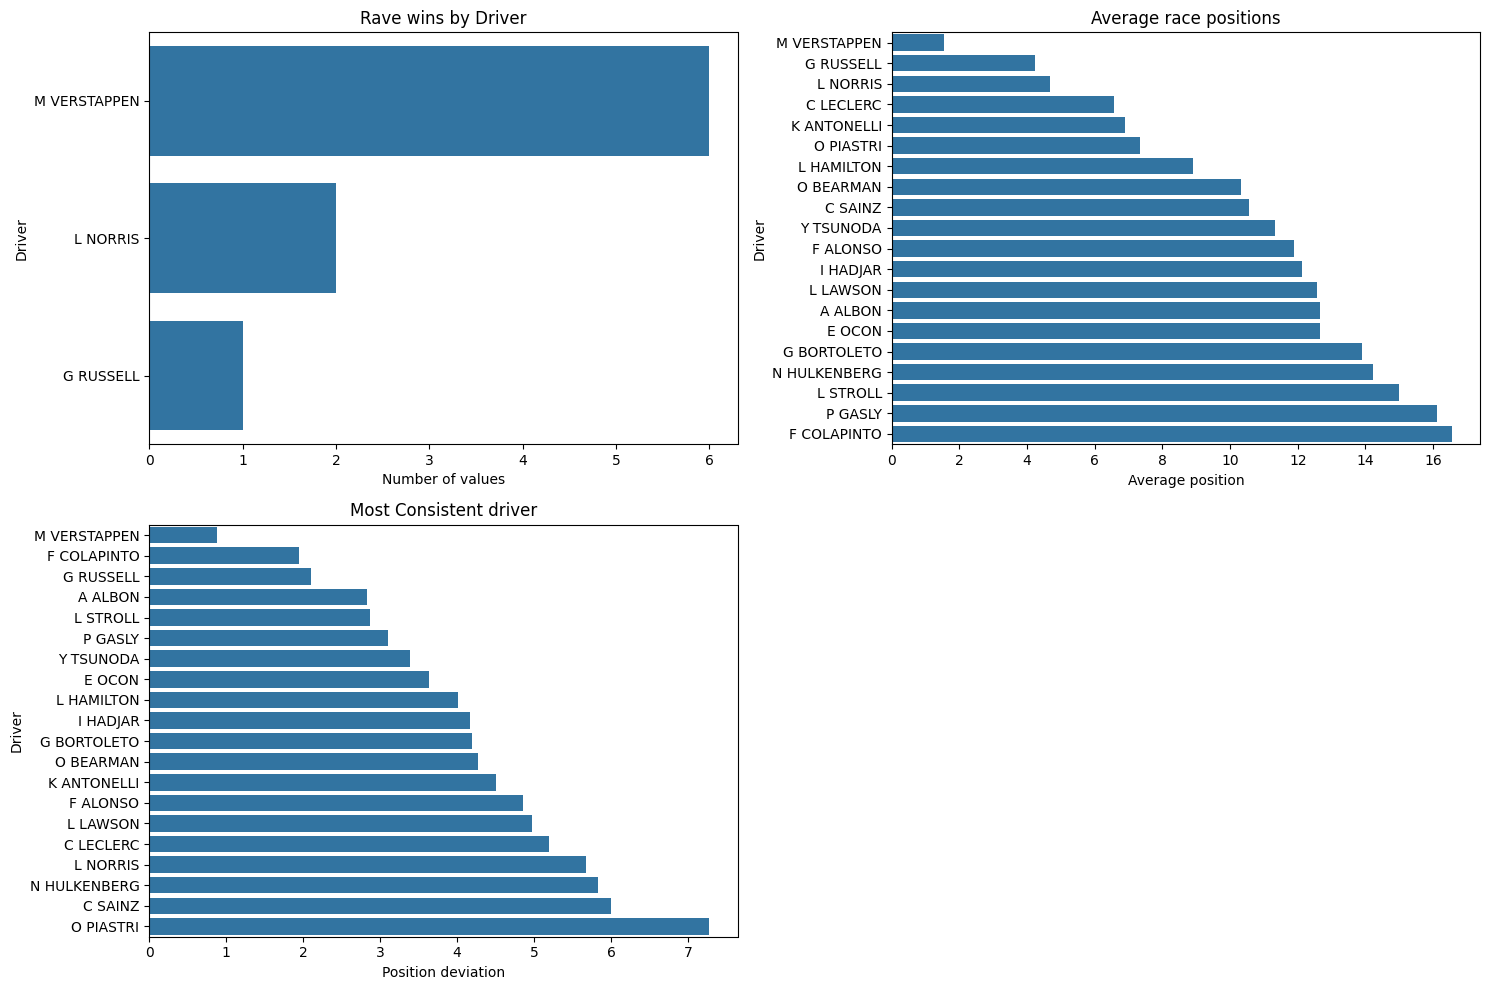

In [ ]:
#Driver wins
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
winners = f1_results[f1_results['Position'] == 1]['Driver'].value_counts()
sns.barplot(x=winners.values, y=winners.index)
plt.title("Rave wins by Driver")
plt.xlabel("Number of values")

#Average finishing position by driver
plt.subplot(2, 2, 2)
avg_positions = f1_results.groupby('Driver')['Position'].mean().sort_values()
sns.barplot(x=avg_positions.values, y=avg_positions.index)
plt.title("Average race positions")
plt.xlabel("Average position")

#driver consistency
plt.subplot(2, 2, 3)
consistency = f1_results.groupby('Driver')['Position'].std().sort_values()
sns.barplot(x=consistency.values, y=consistency.index)
plt.title('Most Consistent driver')
plt.xlabel("Position deviation")

plt.tight_layout()
plt.show()

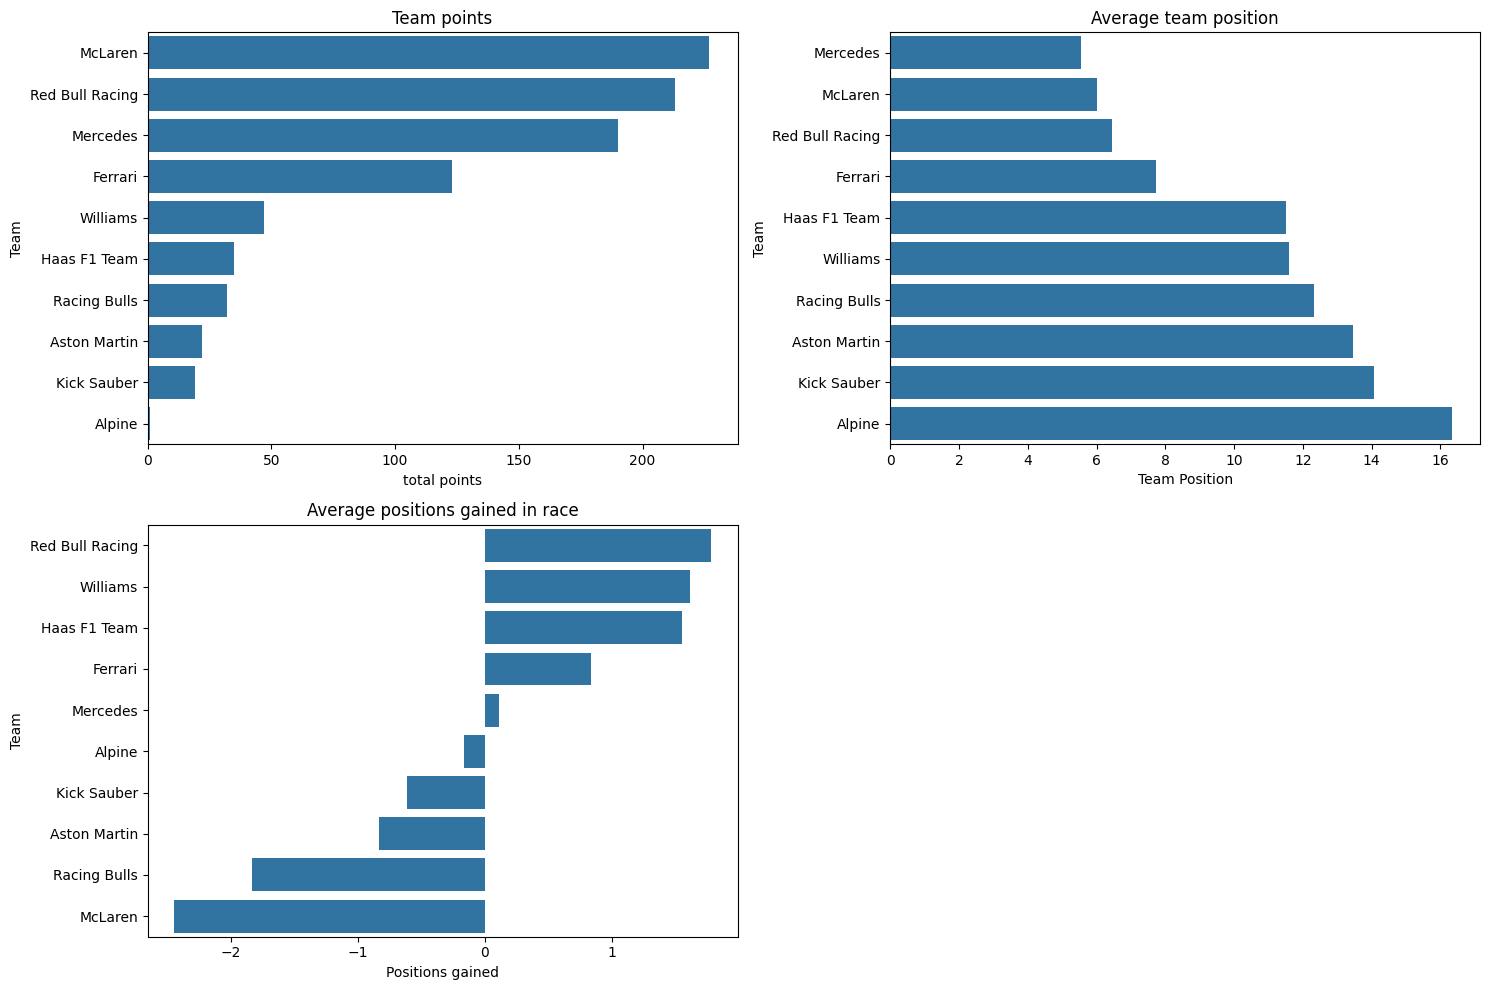

In [12]:
plt.figure(figsize=(15, 10))

#team points
plt.subplot(2, 2, 1)
team_points = f1_results.groupby('Team')['Points'].sum().sort_values(ascending=False)
sns.barplot(x=team_points.values, y=team_points.index)
plt.title("Team points")
plt.xlabel("total points")

#team average position
plt.subplot(2, 2, 2)
team_positions = f1_results.groupby('Team')['Position'].mean().sort_values()
sns.barplot(x=team_positions.values, y=team_positions.index)
plt.title("Average team position")
plt.xlabel("Team Position")


#Position gained or lost by the team in the race
plt.subplot(2, 2, 3)
f1_results['PositionChange'] = f1_results['GridPosition'] - f1_results['Position']
team_imporve = f1_results.groupby('Team')['PositionChange'].mean().sort_values(ascending=False)
sns.barplot(x=team_imporve.values, y=team_imporve.index)
plt.title("Average positions gained in race")
plt.xlabel("Positions gained")

plt.tight_layout()
plt.show()

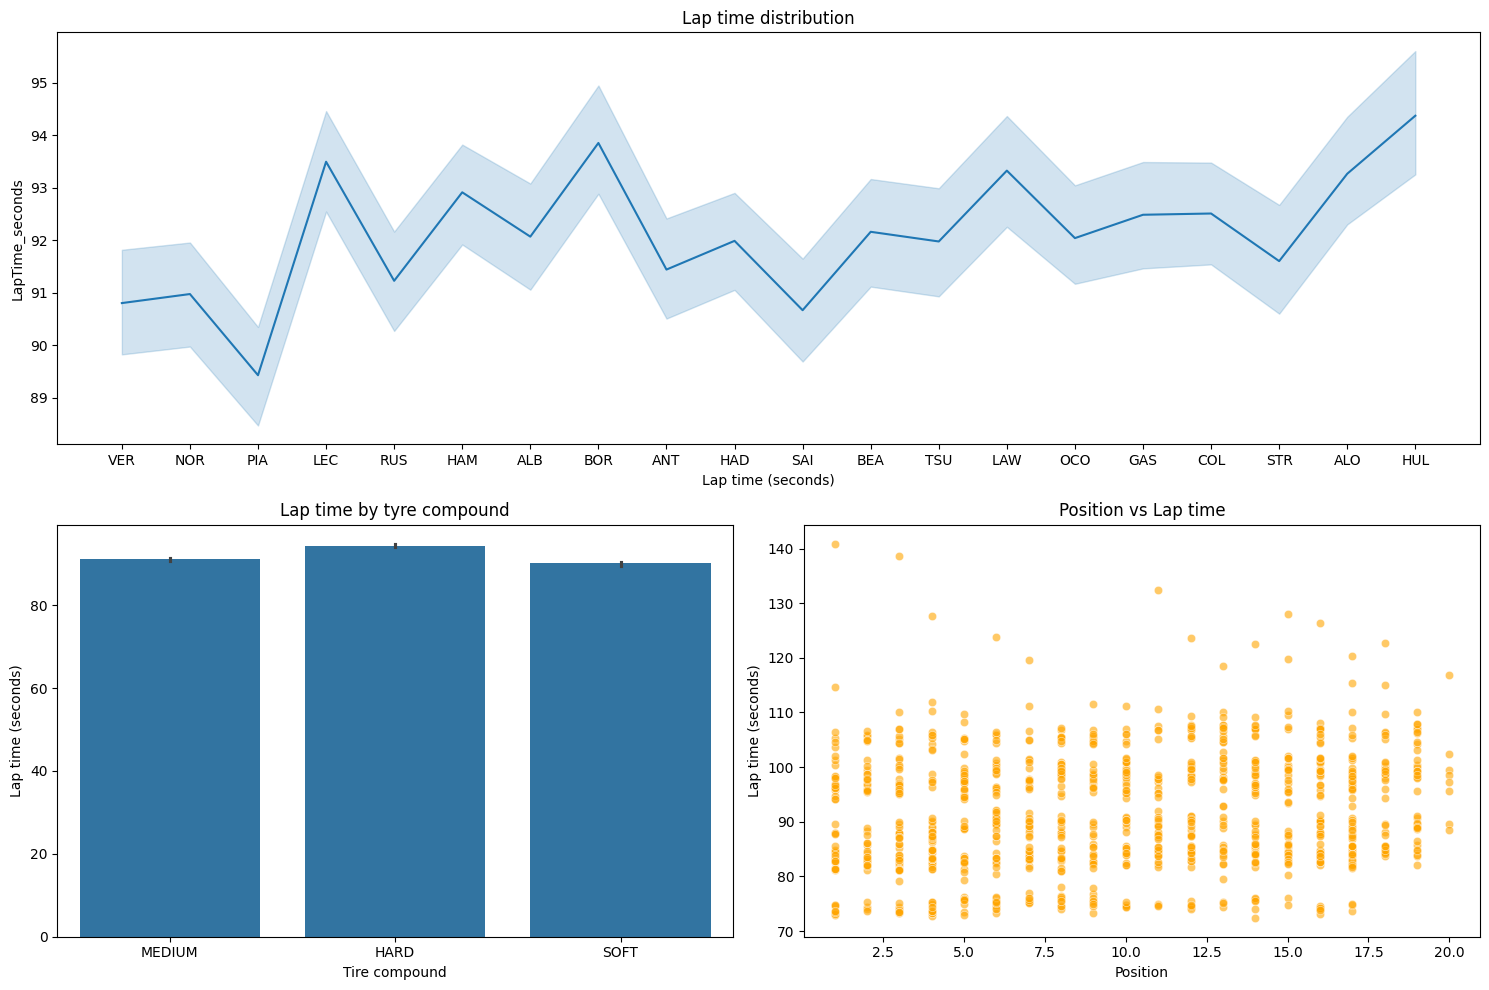

In [13]:
plt.figure(figsize=(15, 10))

#lap time distribution
plt.subplot(2, 1, 1)
sns.lineplot(data=f1_laps,x='Driver', y='LapTime_seconds')
plt.title("Lap time distribution")
plt.xlabel("Lap time (seconds)")

#lap time by tyre compound
plt.subplot(2, 2, 3)
sns.barplot(data=f1_laps, x='TireCompound', y='LapTime_seconds')
plt.title("Lap time by tyre compound")
plt.xlabel("Tire compound")
plt.ylabel("Lap time (seconds)")


plt.subplot(2, 2, 4)
sns.scatterplot(data=f1_laps.sample(1000), x='Position', y='LapTime_seconds', 
                alpha=0.6, color='orange')
plt.title("Position vs Lap time")
plt.xlabel("Position")
plt.ylabel("Lap time (seconds)")


plt.tight_layout()
plt.show()

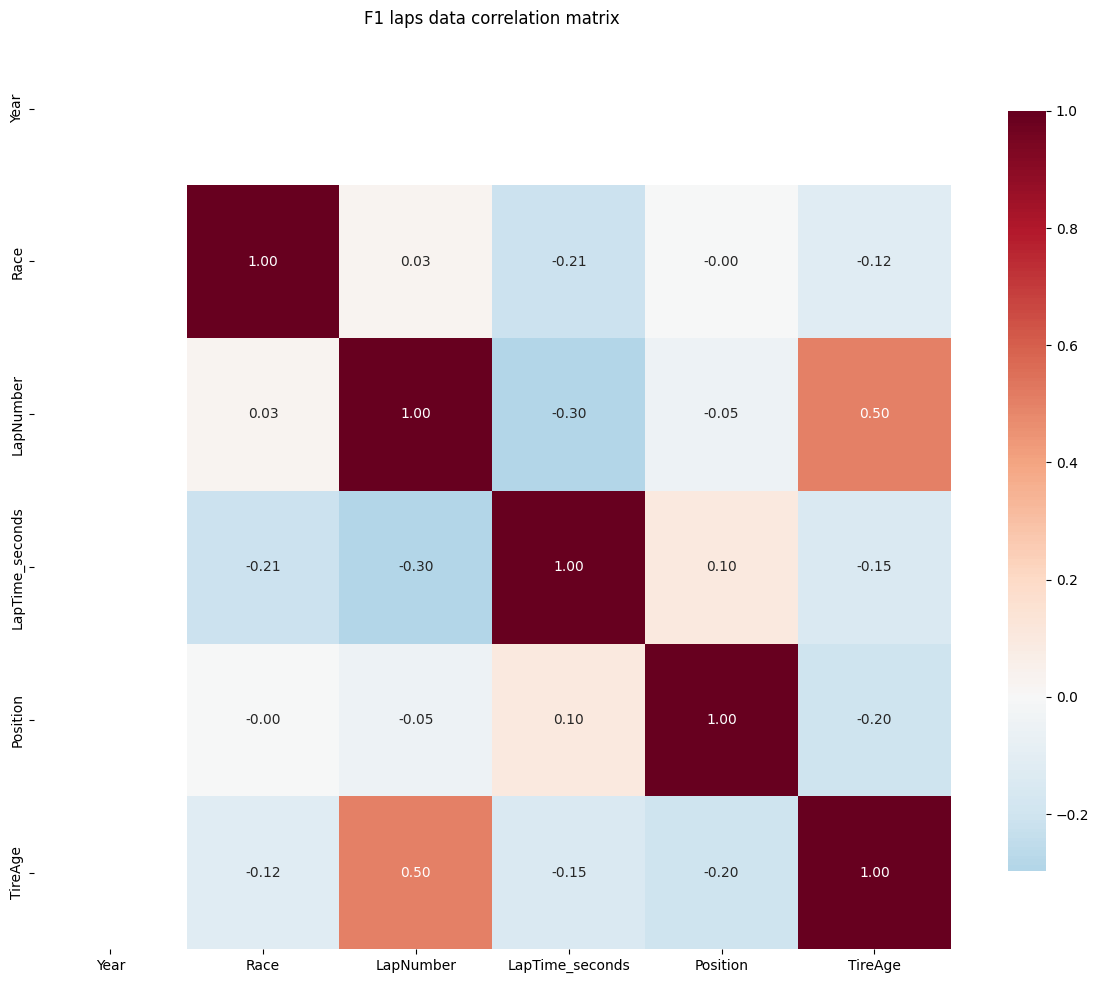

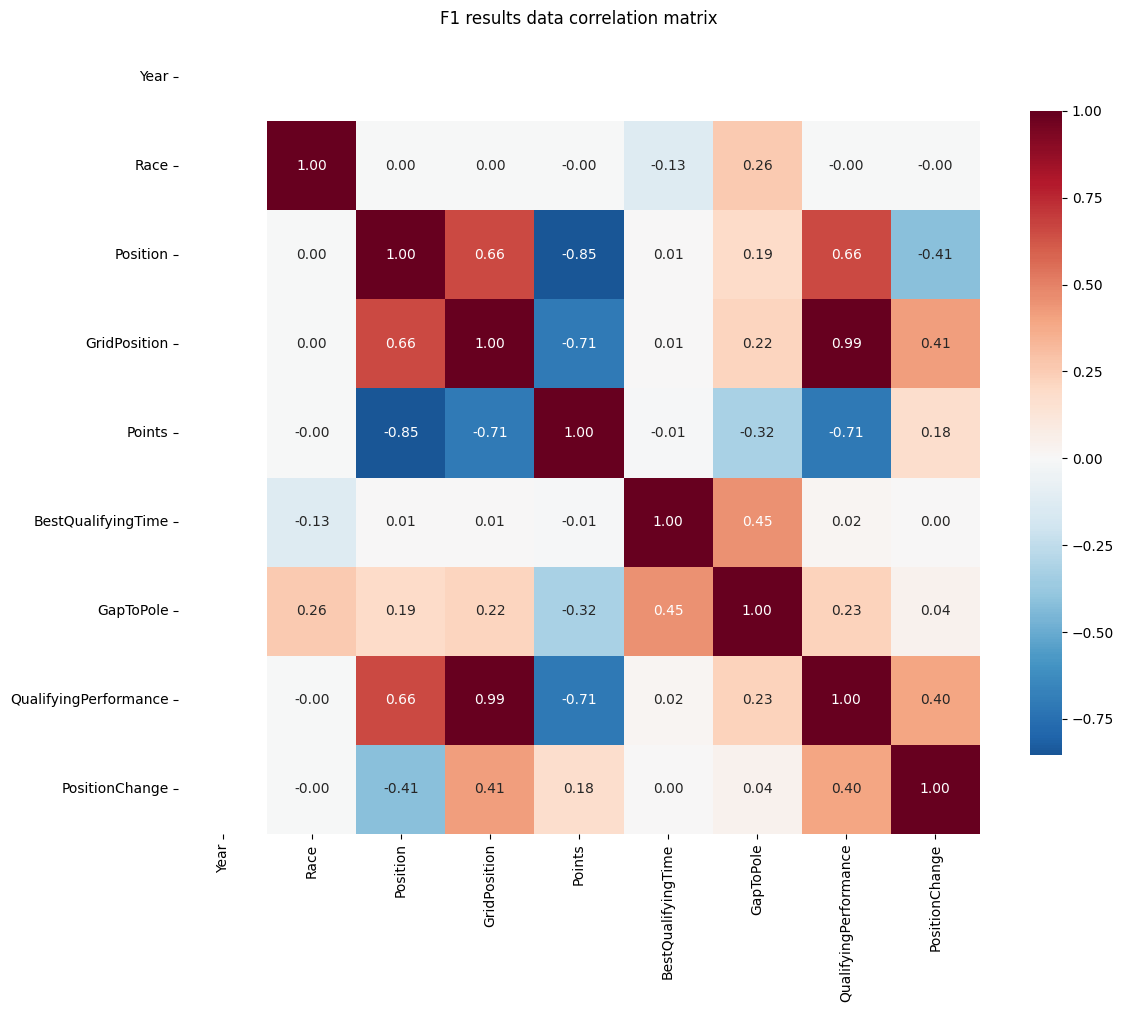

In [ ]:
#correlation heatmap

numerical_cols = f1_laps.select_dtypes(include=[np.number]).columns
correlation_matrix = f1_laps[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title("F1 laps data correlation matrix")
plt.tight_layout()
plt.show()

results_numer = f1_results.select_dtypes(include=[np.number]).columns
results_numerical = f1_results[results_numer].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(results_numerical, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title("F1 results data correlation matrix")
plt.tight_layout()
plt.show()

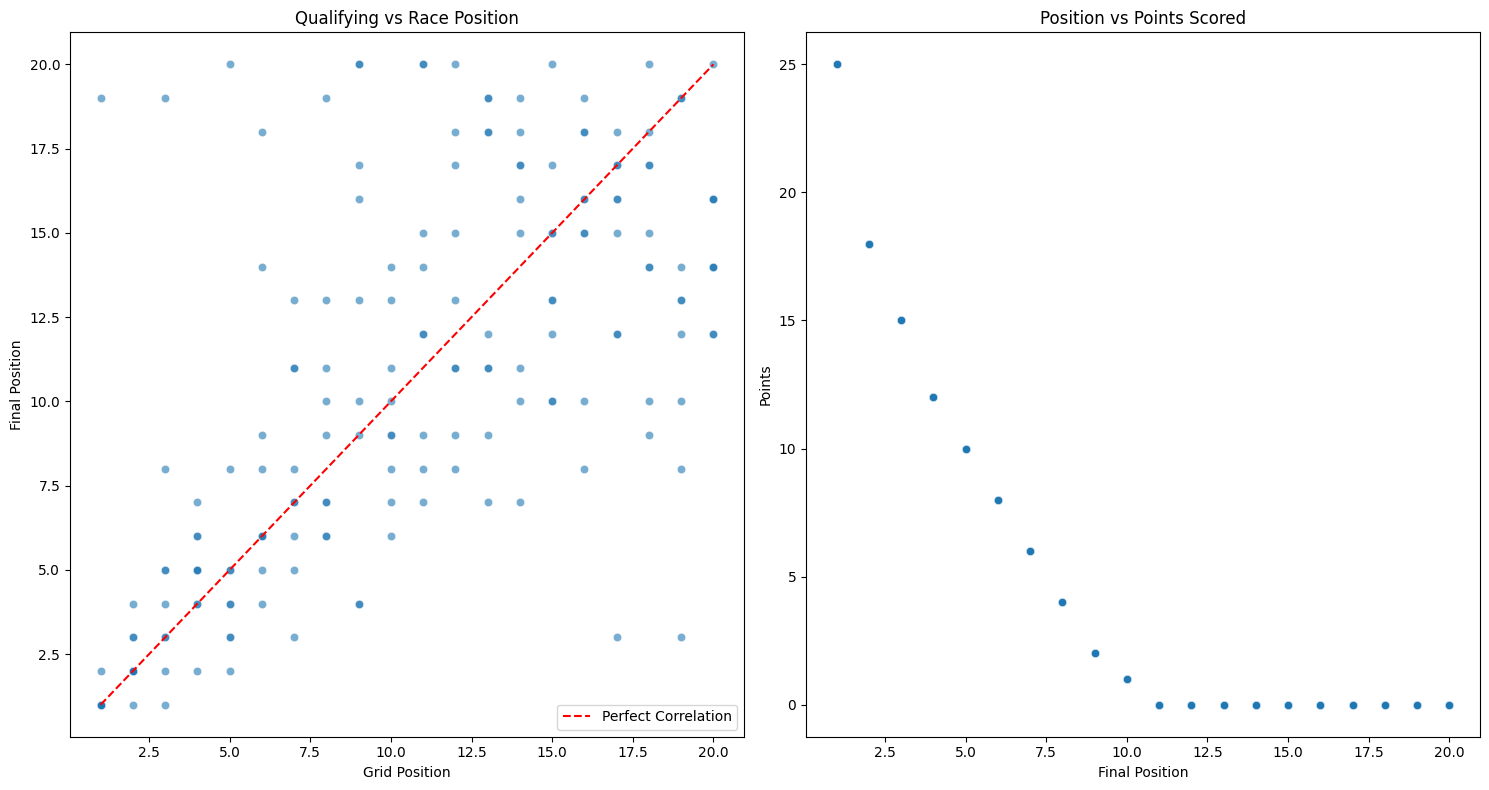

In [15]:
# === RACE STRATEGY PLOTS ===

plt.figure(figsize=(15, 8))

# Grid position vs final position
plt.subplot(1, 2, 1)
sns.scatterplot(data=f1_results, x='GridPosition', y='Position', alpha=0.6)
plt.plot([1, 20], [1, 20], 'r--', label='Perfect Correlation')
plt.title('Qualifying vs Race Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.legend()

# Points vs position relationship
plt.subplot(1, 2, 2)
sns.scatterplot(data=f1_results, x='Position', y='Points', alpha=0.7)
plt.title('Position vs Points Scored')
plt.xlabel('Final Position')
plt.ylabel('Points')

plt.tight_layout()
plt.show()

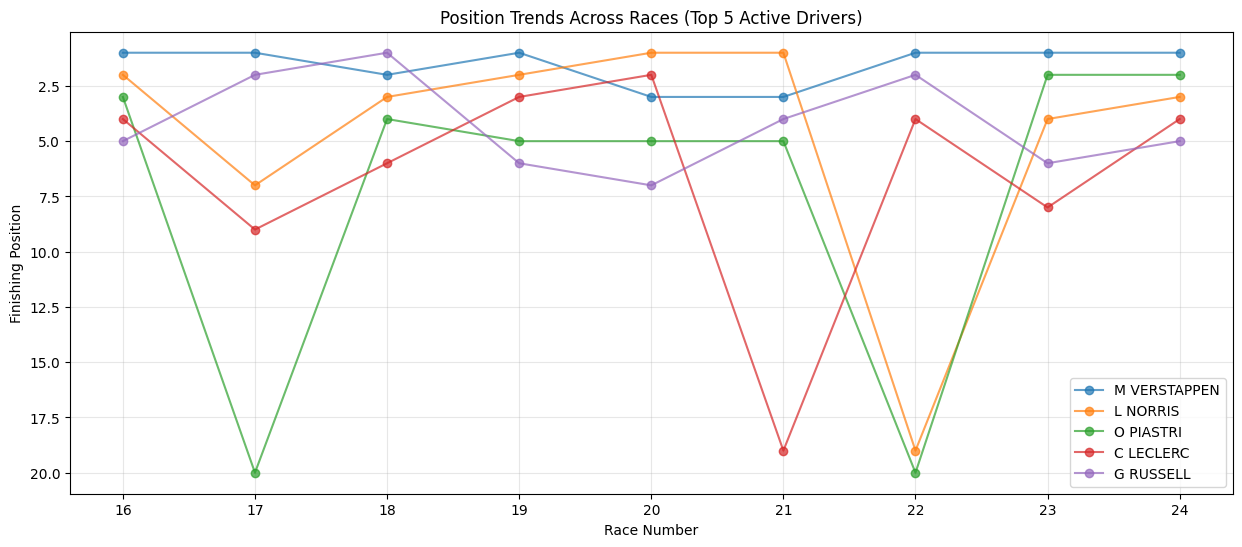

In [16]:
# === PERFORMANCE TRENDS ===

# Driver performance over races (example for top drivers)
top_drivers = f1_results['Driver'].value_counts().head(5).index

plt.figure(figsize=(15, 6))
for driver in top_drivers:
    driver_data = f1_results[f1_results['Driver'] == driver].sort_values('Race')
    plt.plot(driver_data['Race'], driver_data['Position'], "o-", label=driver, alpha=0.7)

plt.title('Position Trends Across Races (Top 5 Active Drivers)')
plt.xlabel('Race Number')
plt.ylabel('Finishing Position')
plt.legend()
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\rajay\AppData\Local\Temp\ipykernel_22012\2671890168.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=team_data, x='Team', y='Position', palette='Set2')
C:\Users\rajay\AppData\Local\Temp\ipykernel_22012\2671890168.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=f1_laps.dropna(), x='PositionGroup', y='LapTime_seconds', palette='viridis')
C:\Users\rajay\AppData\Local\Temp\ipykernel_22012\2671890168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.values, y=status_counts.index, palette='tab10'

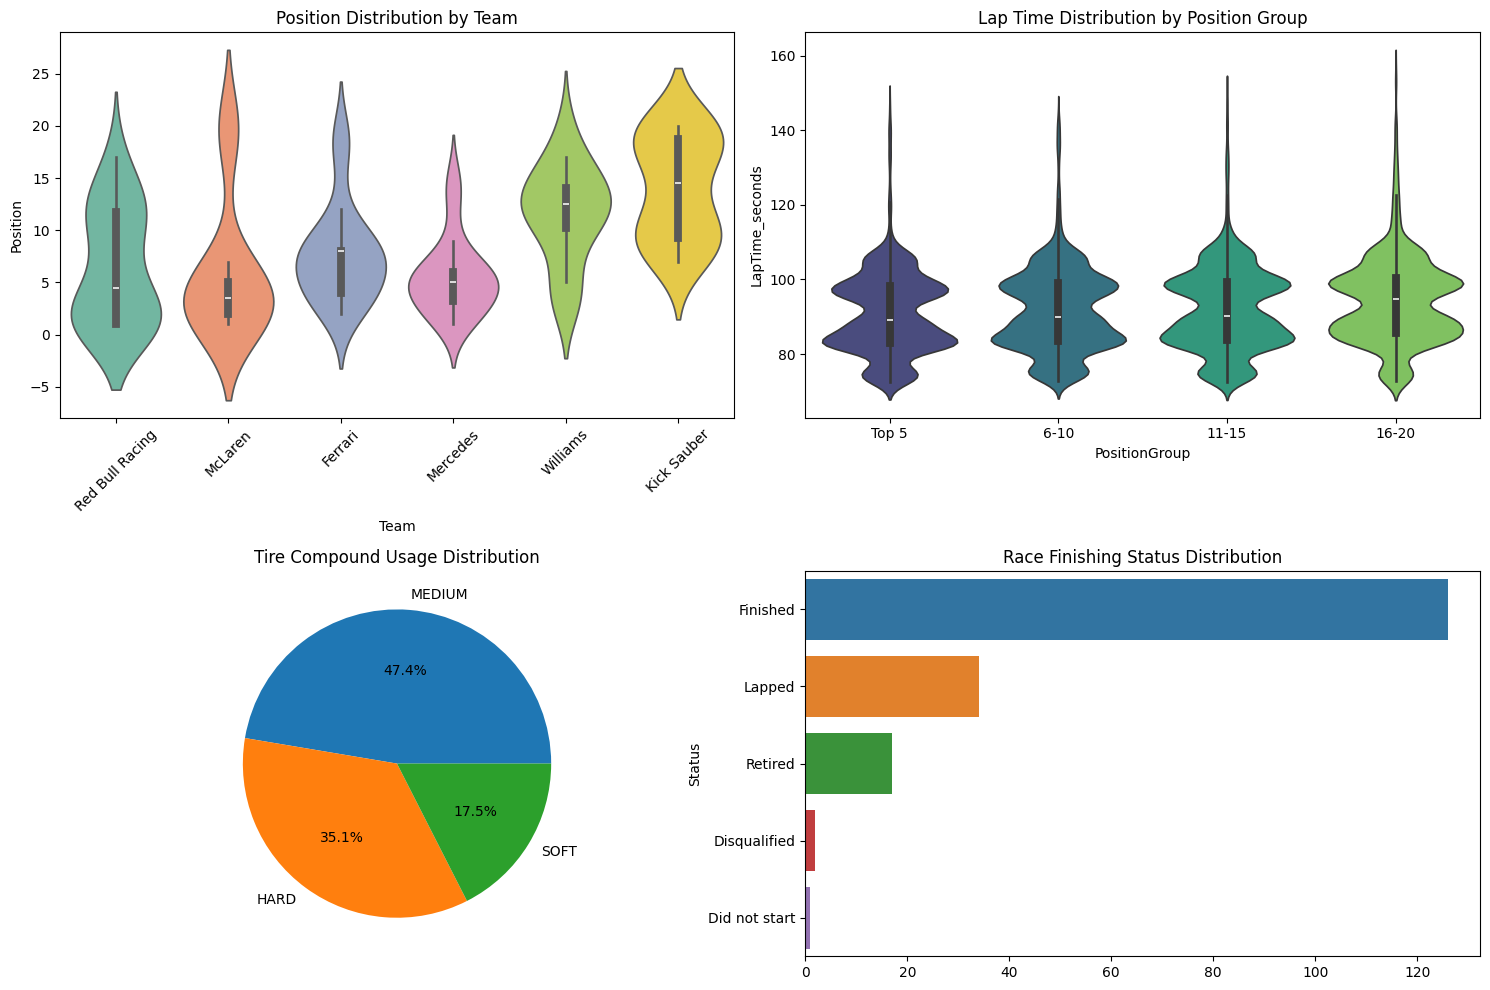

In [17]:
# === ADVANCED DISTRIBUTION PLOTS ===

plt.figure(figsize=(15, 10))

# Driver performance distribution
plt.subplot(2, 2, 1)
top_teams = f1_results['Team'].value_counts().head(6).index
team_data = f1_results[f1_results['Team'].isin(top_teams)]
sns.violinplot(data=team_data, x='Team', y='Position', palette='Set2')
plt.title('Position Distribution by Team')
plt.xticks(rotation=45)

# Lap time distribution by position group
plt.subplot(2, 2, 2)
f1_laps['PositionGroup'] = pd.cut(f1_laps['Position'], 
                                  bins=[0, 5, 10, 15, 20], 
                                  labels=['Top 5', '6-10', '11-15', '16-20'])
sns.violinplot(data=f1_laps.dropna(), x='PositionGroup', y='LapTime_seconds', palette='viridis')
plt.title('Lap Time Distribution by Position Group')

# Tire compound usage
plt.subplot(2, 2, 3)
tire_counts = f1_laps['TireCompound'].value_counts()
plt.pie(tire_counts.values, labels=tire_counts.index, autopct='%1.1f%%')
plt.title('Tire Compound Usage Distribution')

# Race finishing status
plt.subplot(2, 2, 4)
status_counts = f1_results['Status'].value_counts().head(8)
sns.barplot(x=status_counts.values, y=status_counts.index, palette='tab10')
plt.title('Race Finishing Status Distribution')

plt.tight_layout()
plt.show()

In [20]:
quali_race_merge = f1_qualifying.merge(
    f1_results[['Year', 'Race', 'Driver', 'Position', 'Points']],
    on=['Year', 'Race', 'Driver'],
    how='inner'
)

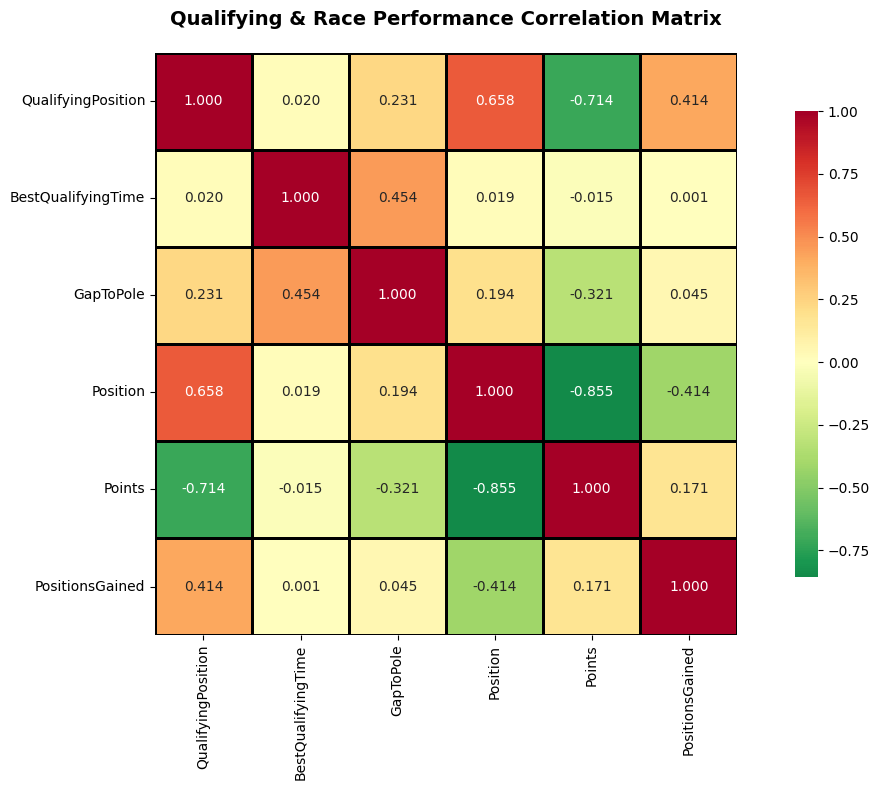


✓ Correlation analysis complete!

Key Correlations:
  QualifyingPosition ↔ RacePosition: 0.658
  GapToPole ↔ RacePosition: 0.194
  BestQualifyingTime ↔ Points: -0.015


In [22]:
if has_qualifying:
    try:
        # Check if quali_race_merge exists and has data
        if 'quali_race_merge' in locals() and len(quali_race_merge) > 0:
            # Create PositionsGained column if it doesn't exist
            if 'PositionsGained' not in quali_race_merge.columns:
                quali_race_merge['PositionsGained'] = quali_race_merge['QualifyingPosition'] - quali_race_merge['Position']
            
            # Create comprehensive correlation matrix
            plt.figure(figsize=(12, 8))
            
            # Select relevant columns for correlation
            correlation_cols = ['QualifyingPosition', 'BestQualifyingTime', 'GapToPole', 
                               'Position', 'Points', 'PositionsGained']
            
            # Filter to only numeric and non-null values
            corr_data = quali_race_merge[correlation_cols].select_dtypes(include=[np.number]).dropna()
            
            if len(corr_data) > 0:
                correlation_matrix = corr_data.corr()
                
                sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn_r', center=0,
                            square=True, fmt='.3f', cbar_kws={'shrink': 0.8},
                            linewidths=1, linecolor='black')
                plt.title('Qualifying & Race Performance Correlation Matrix', 
                          fontsize=14, fontweight='bold', pad=20)
                plt.tight_layout()
                plt.show()
                
                print("\n✓ Correlation analysis complete!")
                print("\nKey Correlations:")
                print(f"  QualifyingPosition ↔ RacePosition: {correlation_matrix.loc['QualifyingPosition', 'Position']:.3f}")
                print(f"  GapToPole ↔ RacePosition: {correlation_matrix.loc['GapToPole', 'Position']:.3f}")
                print(f"  BestQualifyingTime ↔ Points: {correlation_matrix.loc['BestQualifyingTime', 'Points']:.3f}")
            else:
                print("⚠ Not enough data for correlation analysis")
        else:
            print("⚠ Please run cell 12 first to create the quali_race_merge dataset")
    except NameError:
        print("⚠ Please run cell 12 first to create the quali_race_merge dataset")
else:
    print("⚠ Skipping correlation analysis - no qualifying data")

## Qualifying Heatmap Analysis

Correlation between qualifying metrics and race outcomes.

✓ Merged 180 qualifying-race records for analysis


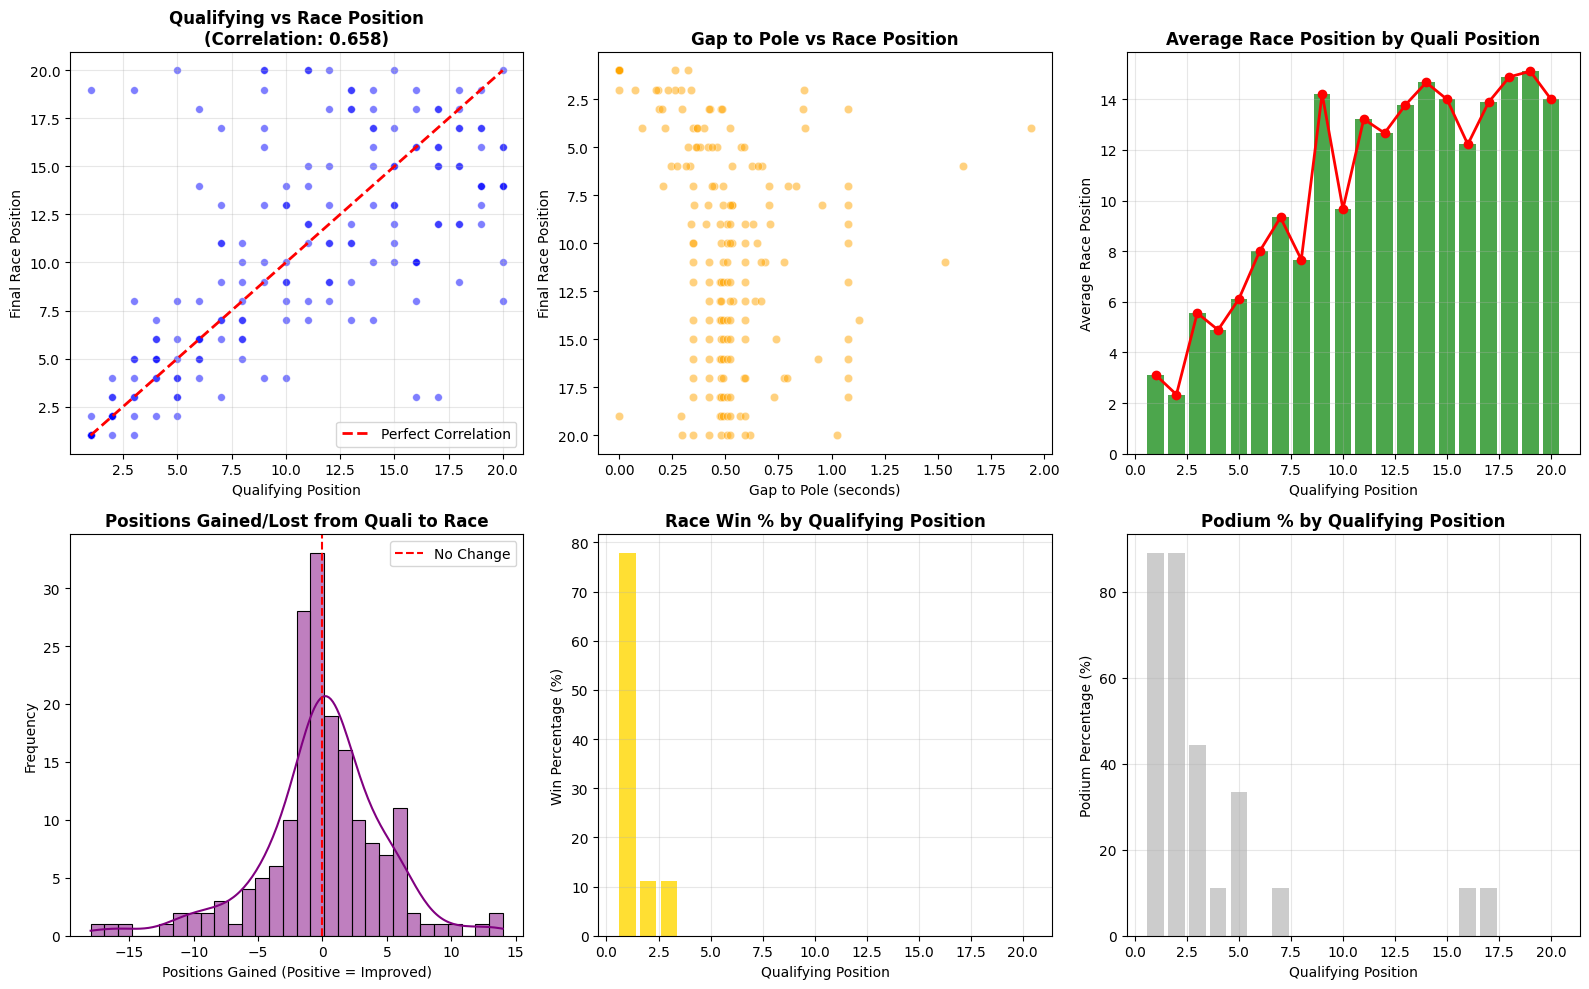


KEY INSIGHTS: QUALIFYING vs RACE
Correlation coefficient: 0.658
  → Strong correlation means qualifying is CRITICAL!

Pole position win rate: 77.8%
Front row (P1-P2) win rate: 44.4%
Top 3 quali podium rate: 74.1%

Average positions gained from quali: 0.00
Median positions gained: 0


In [23]:
if has_qualifying:
    # Merge qualifying with race results for correlation analysis
    quali_race_merge = f1_qualifying.merge(
        f1_results[['Year', 'Race', 'Driver', 'Position', 'Points']],
        on=['Year', 'Race', 'Driver'],
        how='inner'
    )
    
    print(f"✓ Merged {len(quali_race_merge)} qualifying-race records for analysis")
    
    # === QUALIFYING vs RACE CORRELATION ===
    plt.figure(figsize=(16, 10))
    
    # 1. Qualifying Position vs Race Position (Main correlation)
    plt.subplot(2, 3, 1)
    sns.scatterplot(data=quali_race_merge, x='QualifyingPosition', y='Position', 
                   alpha=0.5, s=30, color='blue')
    plt.plot([1, 20], [1, 20], 'r--', label='Perfect Correlation', linewidth=2)
    
    # Add correlation coefficient
    valid_data = quali_race_merge[['QualifyingPosition', 'Position']].dropna()
    correlation = valid_data.corr().iloc[0, 1]
    plt.title(f'Qualifying vs Race Position\n(Correlation: {correlation:.3f})', 
              fontsize=12, fontweight='bold')
    plt.xlabel('Qualifying Position')
    plt.ylabel('Final Race Position')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Gap to Pole vs Race Position
    plt.subplot(2, 3, 2)
    gap_race = quali_race_merge[quali_race_merge['GapToPole'].notna() & (quali_race_merge['GapToPole'] < 3)]
    sns.scatterplot(data=gap_race, x='GapToPole', y='Position', alpha=0.5, color='orange')
    plt.title('Gap to Pole vs Race Position', fontsize=12, fontweight='bold')
    plt.xlabel('Gap to Pole (seconds)')
    plt.ylabel('Final Race Position')
    plt.gca().invert_yaxis()
    
    # 3. Average Race Position by Qualifying Position
    plt.subplot(2, 3, 3)
    avg_race_by_quali = quali_race_merge.groupby('QualifyingPosition')['Position'].mean()
    plt.bar(avg_race_by_quali.index, avg_race_by_quali.values, color='green', alpha=0.7)
    plt.plot(avg_race_by_quali.index, avg_race_by_quali.values, 'ro-', linewidth=2)
    plt.title('Average Race Position by Quali Position', fontsize=12, fontweight='bold')
    plt.xlabel('Qualifying Position')
    plt.ylabel('Average Race Position')
    plt.grid(True, alpha=0.3)
    
    # 4. Position Changes (Grid to Race)
    plt.subplot(2, 3, 4)
    quali_race_merge['PositionsGained'] = quali_race_merge['QualifyingPosition'] - quali_race_merge['Position']
    sns.histplot(data=quali_race_merge, x='PositionsGained', bins=30, kde=True, color='purple')
    plt.axvline(0, color='red', linestyle='--', label='No Change')
    plt.title('Positions Gained/Lost from Quali to Race', fontsize=12, fontweight='bold')
    plt.xlabel('Positions Gained (Positive = Improved)')
    plt.ylabel('Frequency')
    plt.legend()
    
    # 5. Win Rate by Qualifying Position
    plt.subplot(2, 3, 5)
    win_rate_by_quali = quali_race_merge[quali_race_merge['Position'] == 1].groupby('QualifyingPosition').size()
    total_by_quali = quali_race_merge.groupby('QualifyingPosition').size()
    win_percentage = (win_rate_by_quali / total_by_quali * 100).fillna(0)
    plt.bar(win_percentage.index, win_percentage.values, color='gold', alpha=0.8)
    plt.title('Race Win % by Qualifying Position', fontsize=12, fontweight='bold')
    plt.xlabel('Qualifying Position')
    plt.ylabel('Win Percentage (%)')
    plt.grid(True, alpha=0.3)
    
    # 6. Podium Rate by Qualifying Position
    plt.subplot(2, 3, 6)
    podium_rate = quali_race_merge[quali_race_merge['Position'] <= 3].groupby('QualifyingPosition').size()
    podium_percentage = (podium_rate / total_by_quali * 100).fillna(0)
    plt.bar(podium_percentage.index, podium_percentage.values, color='silver', alpha=0.8)
    plt.title('Podium % by Qualifying Position', fontsize=12, fontweight='bold')
    plt.xlabel('Qualifying Position')
    plt.ylabel('Podium Percentage (%)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print key insights
    print("\n" + "="*60)
    print("KEY INSIGHTS: QUALIFYING vs RACE")
    print("="*60)
    print(f"Correlation coefficient: {correlation:.3f}")
    print(f"  → Strong correlation means qualifying is CRITICAL!")
    print(f"\nPole position win rate: {win_percentage.get(1, 0):.1f}%")
    print(f"Front row (P1-P2) win rate: {win_percentage.head(2).mean():.1f}%")
    print(f"Top 3 quali podium rate: {podium_percentage.head(3).mean():.1f}%")
    print(f"\nAverage positions gained from quali: {quali_race_merge['PositionsGained'].mean():.2f}")
    print(f"Median positions gained: {quali_race_merge['PositionsGained'].median():.0f}")
    print("="*60)
    
else:
    print("⚠ Skipping qualifying vs race analysis - no data available")

## Qualifying vs Race Performance

The most important analysis: How does qualifying position affect race results?

C:\Users\rajay\AppData\Local\Temp\ipykernel_22012\3978525006.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=team_quali, x='Team', y='QualifyingPosition', palette='Set2')
C:\Users\rajay\AppData\Local\Temp\ipykernel_22012\3978525006.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_gap.values, y=team_gap.index, palette='viridis')
C:\Users\rajay\AppData\Local\Temp\ipykernel_22012\3978525006.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=q_melted, x='Session', y='Time', palette='muted')
C:\Users\rajay\AppData

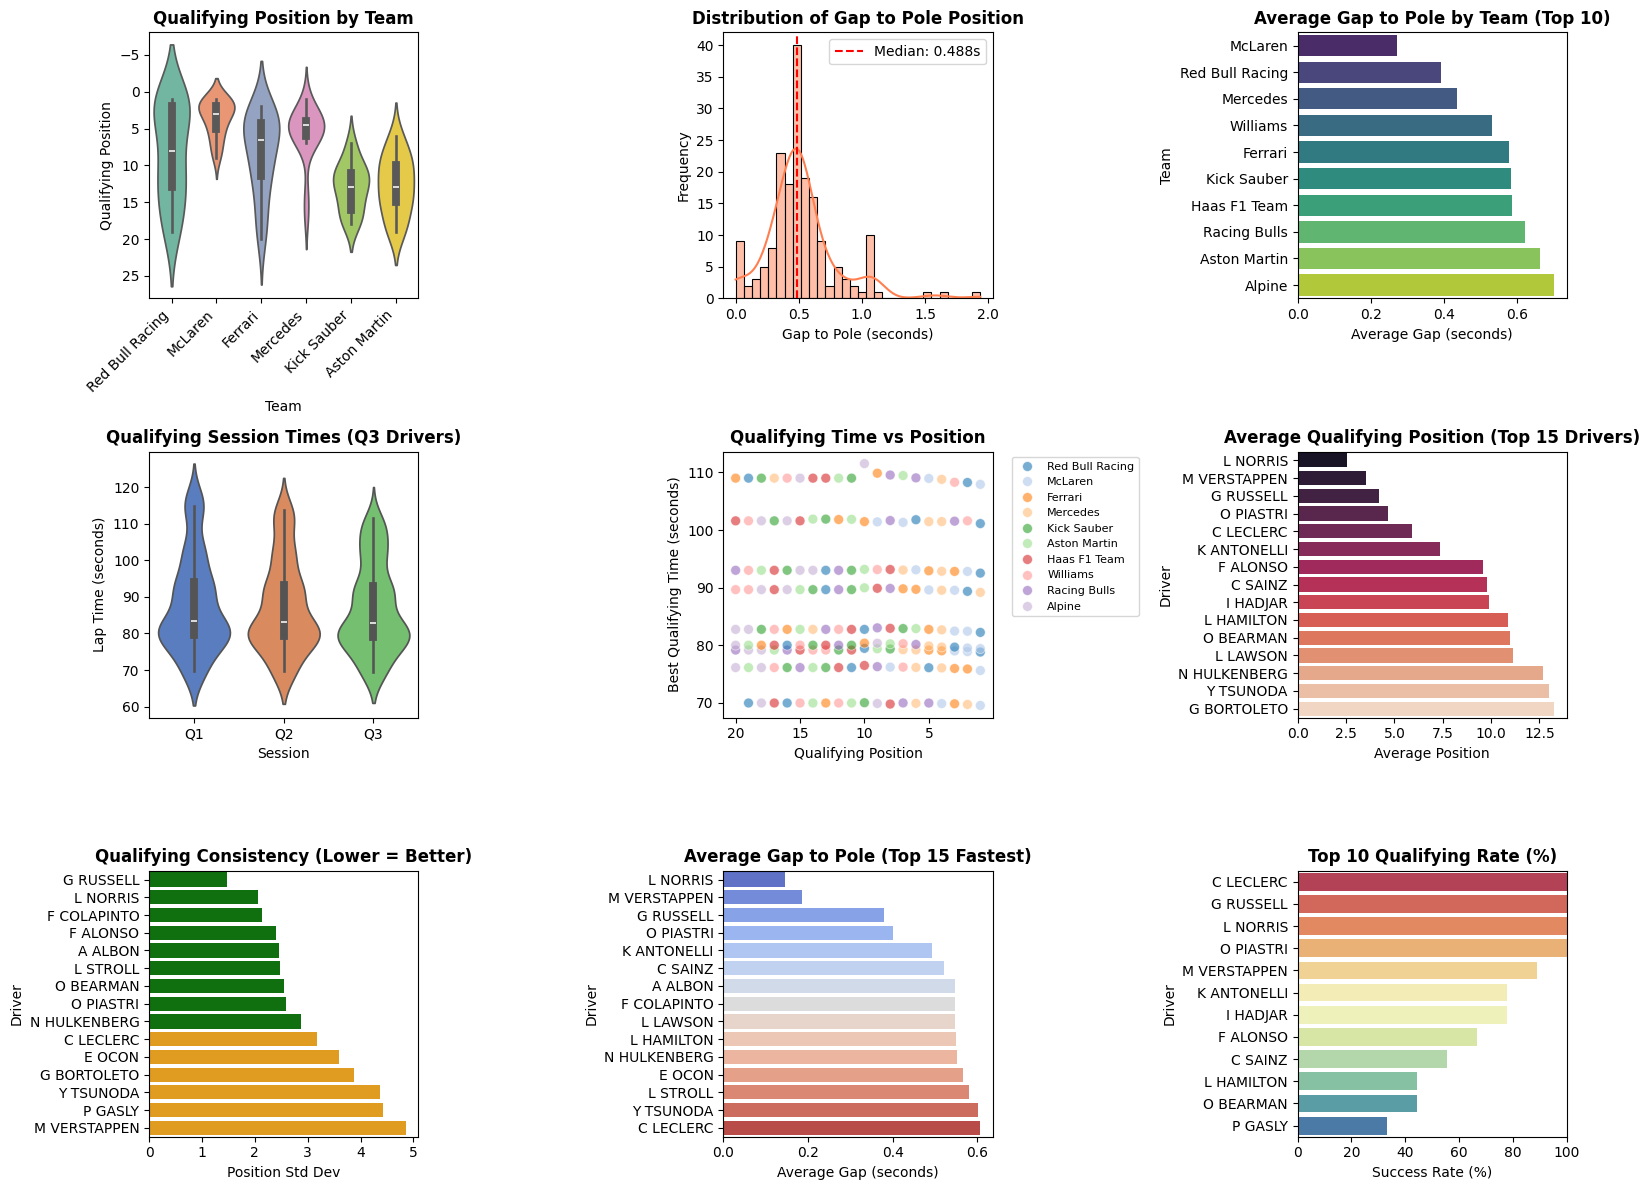


✓ Qualifying analysis complete!


In [24]:
if has_qualifying:
    # === QUALIFYING PERFORMANCE ANALYSIS ===
    plt.figure(figsize=(16, 12))
    
    # 1. Qualifying Position Distribution by Team
    plt.subplot(3, 3, 1)
    top_teams = f1_qualifying['Team'].value_counts().head(6).index
    team_quali = f1_qualifying[f1_qualifying['Team'].isin(top_teams)]
    sns.violinplot(data=team_quali, x='Team', y='QualifyingPosition', palette='Set2')
    plt.title('Qualifying Position by Team', fontsize=12, fontweight='bold')
    plt.xlabel('Team')
    plt.ylabel('Qualifying Position')
    plt.xticks(rotation=45, ha='right')
    plt.gca().invert_yaxis()
    
    # 2. Gap to Pole Distribution
    plt.subplot(3, 3, 2)
    gap_data = f1_qualifying[f1_qualifying['GapToPole'].notna() & (f1_qualifying['GapToPole'] < 3)]
    sns.histplot(data=gap_data, x='GapToPole', bins=30, kde=True, color='coral')
    plt.title('Distribution of Gap to Pole Position', fontsize=12, fontweight='bold')
    plt.xlabel('Gap to Pole (seconds)')
    plt.ylabel('Frequency')
    plt.axvline(gap_data['GapToPole'].median(), color='red', linestyle='--', 
                label=f'Median: {gap_data["GapToPole"].median():.3f}s')
    plt.legend()
    
    # 3. Average Gap to Pole by Team
    plt.subplot(3, 3, 3)
    team_gap = f1_qualifying[f1_qualifying['GapToPole'].notna()].groupby('Team')['GapToPole'].mean().sort_values().head(10)
    sns.barplot(x=team_gap.values, y=team_gap.index, palette='viridis')
    plt.title('Average Gap to Pole by Team (Top 10)', fontsize=12, fontweight='bold')
    plt.xlabel('Average Gap (seconds)')
    plt.ylabel('Team')
    
    # 4. Q1 vs Q2 vs Q3 Times Comparison (for drivers who made it to Q3)
    plt.subplot(3, 3, 4)
    q3_drivers = f1_qualifying[f1_qualifying['Q3'].notna()].copy()
    q_times = q3_drivers[['Q1', 'Q2', 'Q3']].apply(pd.to_numeric, errors='coerce')
    q_melted = pd.melt(q_times, var_name='Session', value_name='Time')
    sns.violinplot(data=q_melted, x='Session', y='Time', palette='muted')
    plt.title('Qualifying Session Times (Q3 Drivers)', fontsize=12, fontweight='bold')
    plt.xlabel('Session')
    plt.ylabel('Lap Time (seconds)')
    
    # 5. Best Qualifying Time vs Position
    plt.subplot(3, 3, 5)
    quali_clean = f1_qualifying[f1_qualifying['BestQualifyingTime'].notna()]
    sns.scatterplot(data=quali_clean, x='QualifyingPosition', y='BestQualifyingTime', 
                   hue='Team', alpha=0.6, s=50, palette='tab20')
    plt.title('Qualifying Time vs Position', fontsize=12, fontweight='bold')
    plt.xlabel('Qualifying Position')
    plt.ylabel('Best Qualifying Time (seconds)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.gca().invert_xaxis()
    
    # 6. Average Qualifying Position by Driver (Top 15)
    plt.subplot(3, 3, 6)
    driver_avg_quali = f1_qualifying.groupby('Driver')['QualifyingPosition'].mean().sort_values().head(15)
    sns.barplot(x=driver_avg_quali.values, y=driver_avg_quali.index, palette='rocket')
    plt.title('Average Qualifying Position (Top 15 Drivers)', fontsize=12, fontweight='bold')
    plt.xlabel('Average Position')
    plt.ylabel('Driver')
    
    # 7. Qualifying Consistency (Standard Deviation)
    plt.subplot(3, 3, 7)
    driver_consistency = f1_qualifying.groupby('Driver')['QualifyingPosition'].std().sort_values().head(15)
    colors = ['green' if x < 3 else 'orange' if x < 5 else 'red' for x in driver_consistency.values]
    sns.barplot(x=driver_consistency.values, y=driver_consistency.index, palette=colors)
    plt.title('Qualifying Consistency (Lower = Better)', fontsize=12, fontweight='bold')
    plt.xlabel('Position Std Dev')
    plt.ylabel('Driver')
    
    # 8. Gap to Pole by Driver (Top 15)
    plt.subplot(3, 3, 8)
    driver_gap = f1_qualifying[f1_qualifying['GapToPole'].notna()].groupby('Driver')['GapToPole'].mean().sort_values().head(15)
    sns.barplot(x=driver_gap.values, y=driver_gap.index, palette='coolwarm')
    plt.title('Average Gap to Pole (Top 15 Fastest)', fontsize=12, fontweight='bold')
    plt.xlabel('Average Gap (seconds)')
    plt.ylabel('Driver')
    
    # 9. Qualifying Success Rate (Top 10 percentage)
    plt.subplot(3, 3, 9)
    total_quali = f1_qualifying['Driver'].value_counts()
    top10_quali = f1_qualifying[f1_qualifying['QualifyingPosition'] <= 10]['Driver'].value_counts()
    success_rate = (top10_quali / total_quali * 100).sort_values(ascending=False).head(12)
    sns.barplot(x=success_rate.values, y=success_rate.index, palette='Spectral')
    plt.title('Top 10 Qualifying Rate (%)', fontsize=12, fontweight='bold')
    plt.xlabel('Success Rate (%)')
    plt.ylabel('Driver')
    plt.xlim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Qualifying analysis complete!")
else:
    print("⚠ Skipping qualifying visualizations - no data available")

In [25]:
if has_qualifying:
    # Calculate best qualifying time and gap to pole
    quali_times = f1_qualifying[['Q1', 'Q2', 'Q3']].apply(pd.to_numeric, errors='coerce')
    f1_qualifying['BestQualifyingTime'] = quali_times.min(axis=1)
    
    # Calculate gap to pole for each race
    for race in f1_qualifying['Race'].unique():
        race_mask = f1_qualifying['Race'] == race
        pole_time = f1_qualifying.loc[race_mask, 'BestQualifyingTime'].min()
        f1_qualifying.loc[race_mask, 'GapToPole'] = f1_qualifying.loc[race_mask, 'BestQualifyingTime'] - pole_time
    
    print("✓ Qualifying features calculated")
    print(f"  - BestQualifyingTime: {f1_qualifying['BestQualifyingTime'].notna().sum()} values")
    print(f"  - GapToPole: {f1_qualifying['GapToPole'].notna().sum()} values")
else:
    print("⚠ Skipping qualifying analysis - no data available")

✓ Qualifying features calculated
  - BestQualifyingTime: 180 values
  - GapToPole: 180 values


# Qualifying Analysis

Now let's analyze qualifying performance and its impact on race results.

In [26]:
# Calculate driver statistics
driver_wins = f1_results[f1_results['Position'] == 1]['Driver'].value_counts()
driver_total_races = f1_results['Driver'].value_counts()
driver_win_rate = (driver_wins / driver_total_races * 100).fillna(0)

In [27]:
# 2. Merge feature
f1_laps = f1_laps.merge(driver_win_rate.rename('driver_win_rate'), 
                        left_on='Driver', right_index=True, how='left')
f1_results = f1_results.merge(driver_win_rate.rename('driver_win_rate'), 
                              left_on='Driver', right_index=True, how='left')
f1_laps['driver_win_rate'] = f1_laps['driver_win_rate'].fillna(0)
f1_results['driver_win_rate'] = f1_results['driver_win_rate'].fillna(0)


In [28]:
# Position change from start
f1_laps['start_position'] = f1_laps.groupby(['Driver', 'Race'])['Position'].transform('first')
f1_laps['positions_gained'] = f1_laps['start_position'] - f1_laps['Position']

# Tire degradation
f1_laps['tire_degradation'] = f1_laps.groupby(['Driver', 'Race', 'TireCompound'])['LapTime_seconds'].diff()

# Race phase
f1_laps['race_phase'] = pd.cut(f1_laps['LapNumber'], 
                               bins=[0, 15, 40, 100], 
                               labels=['Early', 'Middle', 'Late'])


In [29]:
# Team reliability
team_reliability = f1_results.groupby('Team').apply(
    lambda x: (x['Status'] == 'Finished').mean() * 100
)

f1_laps = f1_laps.merge(team_reliability.rename('team_reliability'), 
                        left_on='Team', right_index=True, how='left')
f1_results = f1_results.merge(team_reliability.rename('team_reliability'), 
                              left_on='Team', right_index=True, how='left')


C:\Users\rajay\AppData\Local\Temp\ipykernel_22012\39696473.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_reliability = f1_results.groupby('Team').apply(


In [30]:
# Race winners (for classification)
f1_results['race_winner'] = (f1_results['Position'] == 1).astype(int)
f1_results['podium_finish'] = (f1_results['Position'] <= 3).astype(int)
f1_results['points_finish'] = (f1_results['Position'] <= 10).astype(int)


In [ ]:
f1_laps.head(10)

,Year,Race,Driver,Team,LapNumber,LapTime_seconds,Position,TireCompound,TireAge,PositionGroup,driver_win_rate,start_position,positions_gained,tire_degradation,race_phase,team_reliability
0,2024,1,VER,Red Bull Racing,1.0,97.284,1.0,1.0,4.0,Top 5,0.0,1.0,0.0,NaN,Early,83.333333
1,2024,1,VER,Red Bull Racing,2.0,96.296,1.0,1.0,5.0,Top 5,0.0,1.0,0.0,-0.988,Early,83.333333
2,2024,1,VER,Red Bull Racing,3.0,96.753,1.0,1.0,6.0,Top 5,0.0,1.0,0.0,0.457,Early,83.333333
3,2024,1,VER,Red Bull Racing,4.0,96.647,1.0,1.0,7.0,Top 5,0.0,1.0,0.0,-0.106,Early,83.333333
4,2024,1,VER,Red Bull Racing,5.0,97.173,1.0,1.0,8.0,Top 5,0.0,1.0,0.0,0.526,Early,83.333333
5,2024,1,VER,Red Bull Racing,6.0,97.092,1.0,1.0,9.0,Top 5,0.0,1.0,0.0,-0.081,Early,83.333333
6,2024,1,VER,Red Bull Racing,7.0,97.038,1.0,1.0,10.0,Top 5,0.0,1.0,0.0,-0.054,Early,83.333333
7,2024,1,VER,Red Bull Racing,8.0,97.024,1.0,1.0,11.0,Top 5,0.0,1.0,0.0,-0.014,Early,83.333333
8,2024,1,VER,Red Bull Racing,9.0,97.229,1.0,1.0,12.0,Top 5,0.0,1.0,0.0,0.205,Early,83.333333
9,2024,1,VER,Red Bull Racing,10.0,96.960,1.0,1.0,13.0,Top 5,0.0,1.0,0.0,-0.269,Early,83.333333


In [31]:
f1_laps.isnull().sum()

Year                  0
Race                  0
Driver                0
Team                  0
LapNumber             0
LapTime_seconds       0
Position              0
TireCompound          0
TireAge               0
PositionGroup         0
driver_win_rate       0
start_position        0
positions_gained      0
tire_degradation    361
race_phase            0
team_reliability      0
dtype: int64

In [32]:
f1_results.head(10)

,Year,Race,Driver,Team,Position,GridPosition,Points,Status,BestQualifyingTime,GapToPole,QualifyingPerformance,PositionChange,driver_win_rate,team_reliability,race_winner,podium_finish,points_finish
0,2025,16,M VERSTAPPEN,Red Bull Racing,1.0,1.0,25.0,Finished,78.7920,0.0000,5.0,0.0,66.666667,94.444444,1,1,1
1,2025,16,L NORRIS,McLaren,2.0,2.0,18.0,Finished,78.8690,0.0770,10.0,0.0,22.222222,83.333333,0,1,1
2,2025,16,O PIASTRI,McLaren,3.0,3.0,15.0,Finished,78.9820,0.1900,15.0,0.0,0.000000,83.333333,0,1,1
3,2025,16,C LECLERC,Ferrari,4.0,4.0,12.0,Finished,79.0070,0.2150,20.0,0.0,0.000000,88.888889,0,0,1
4,2025,16,G RUSSELL,Mercedes,5.0,5.0,10.0,Finished,79.1570,0.3650,30.0,0.0,11.111111,100.000000,0,0,1
5,2025,16,L HAMILTON,Ferrari,6.0,10.0,8.0,Finished,79.1240,0.3320,25.0,4.0,0.000000,88.888889,0,0,1
6,2025,16,A ALBON,Williams,7.0,14.0,6.0,Finished,79.1405,0.3485,70.0,7.0,0.000000,66.666667,0,0,1
7,2025,16,G BORTOLETO,Kick Sauber,8.0,7.0,4.0,Finished,79.3230,0.5310,40.0,-1.0,0.000000,55.555556,0,0,1
8,2025,16,K ANTONELLI,Mercedes,9.0,6.0,2.0,Finished,79.2000,0.4080,35.0,-3.0,0.000000,100.000000,0,0,1
9,2025,16,I HADJAR,Racing Bulls,10.0,19.0,1.0,Finished,79.1405,0.3485,80.0,9.0,0.000000,55.555556,0,0,1


In [33]:
f1_results.isnull().sum()

Year                     0
Race                     0
Driver                   0
Team                     0
Position                 0
GridPosition             0
Points                   0
Status                   0
BestQualifyingTime       0
GapToPole                0
QualifyingPerformance    1
PositionChange           0
driver_win_rate          0
team_reliability         0
race_winner              0
podium_finish            0
points_finish            0
dtype: int64

In [34]:
f1_laps['tire_degradation'].value_counts()

tire_degradation
 0.000     46
-0.056     19
-0.024     17
-0.077     16
-0.035     15
           ..
 16.806     1
-21.581     1
-9.607      1
-0.997      1
 3.031      1
Name: count, Length: 3962, dtype: int64

In [35]:
f1_laps.describe()

,Year,Race,LapNumber,LapTime_seconds,Position,TireAge,driver_win_rate,start_position,positions_gained,tire_degradation,team_reliability
count,9862.0,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.0,9862.000000,9862.000000,9501.000000,9862.000000
mean,2025.0,20.052626,29.805009,92.073104,9.856114,15.521699,0.0,10.187893,0.331779,-0.478790,70.440974
std,0.0,2.530850,17.649347,11.372830,5.433531,10.037385,0.0,5.658690,3.374421,6.132334,23.804645
min,2025.0,16.000000,1.000000,72.400000,1.000000,1.000000,0.0,1.000000,-13.000000,-55.838000,16.666667
25%,2025.0,18.000000,15.000000,83.676750,5.000000,7.000000,0.0,5.000000,-1.000000,-0.267000,55.555556
50%,2025.0,20.000000,29.000000,90.080000,10.000000,14.000000,0.0,10.000000,0.000000,-0.019000,77.777778
75%,2025.0,22.000000,44.000000,99.260750,14.000000,22.000000,0.0,15.000000,2.000000,0.220000,88.888889
max,2025.0,24.000000,71.000000,156.417000,20.000000,52.000000,0.0,20.000000,17.000000,53.762000,100.000000


In [36]:
f1_laps['tire_degradation'] = f1_laps['tire_degradation'].fillna(f1_laps['tire_degradation'].median())

In [37]:
f1_laps.isnull().sum()

Year                0
Race                0
Driver              0
Team                0
LapNumber           0
LapTime_seconds     0
Position            0
TireCompound        0
TireAge             0
PositionGroup       0
driver_win_rate     0
start_position      0
positions_gained    0
tire_degradation    0
race_phase          0
team_reliability    0
dtype: int64

In [38]:
f1_laps.to_csv("../data/f1_laps_features.csv", index=False)
f1_results.to_csv("../data/f1_results_features.csv", index=False)